<a href="https://colab.research.google.com/github/pmandnikar/spring-boot-samples/blob/master/IRAssignment_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
============== Before Stemming Analysis =================
============== Unigram Analysis Q1=================
 (a) Total of Unique  Unigrams  present are: 75873
 (b) Frequency Distribution plot


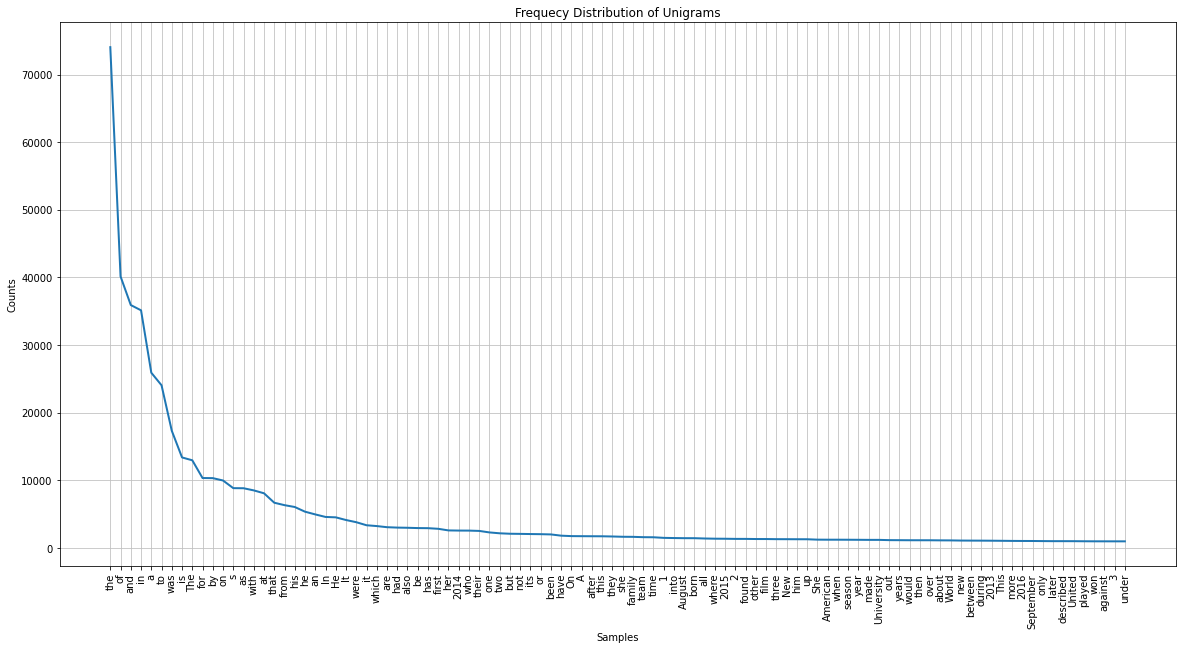

======== Frequency Vs Rank ==========


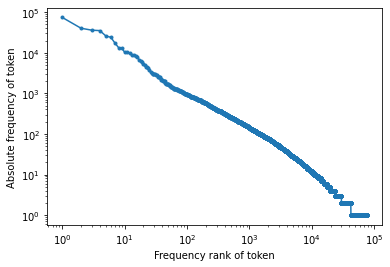

<Figure size 1440x720 with 0 Axes>

(c) Most frequent  Unigrams  required to cover 90% of corpus are: 26893
============== Bigram Analysis Q2=================
 (a) Total of Unique  Bigrams  present are: 571415
 (b) Frequency Distribution plot


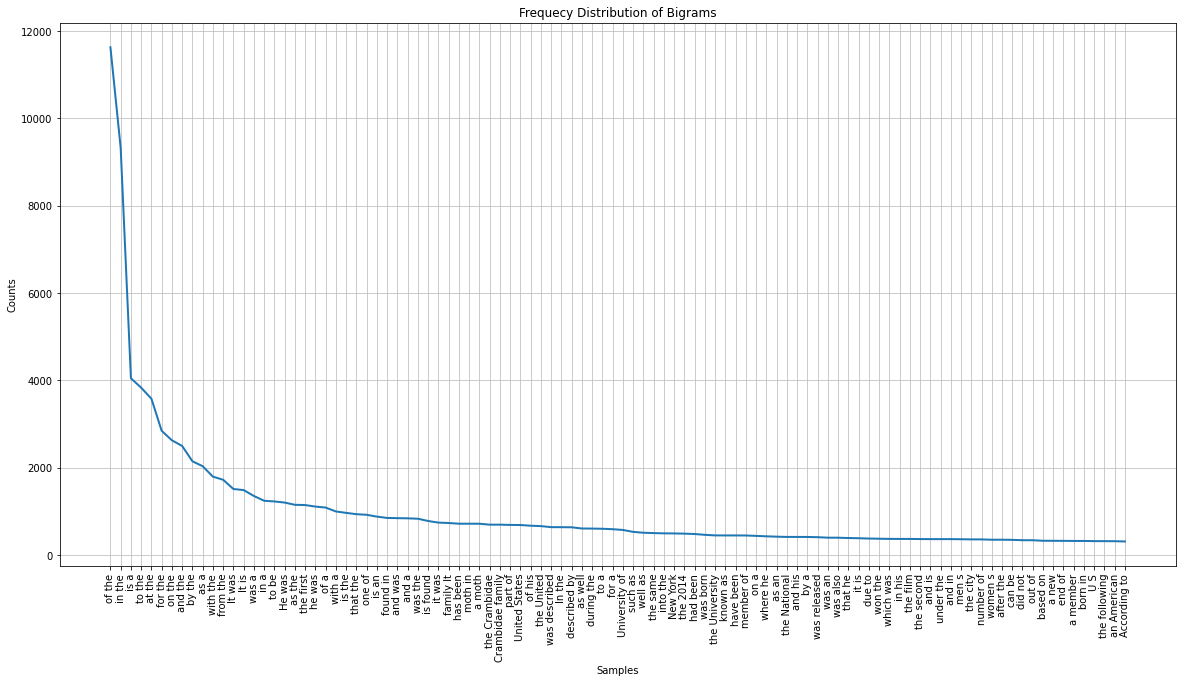

======== Frequency Vs Rank ==========


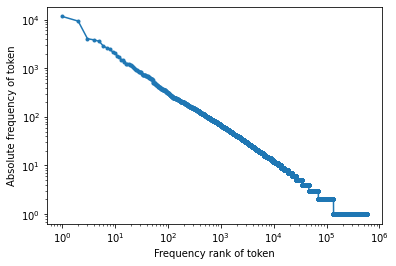

<Figure size 1440x720 with 0 Axes>

(c) Most frequent  Bigrams  required to cover 90% of corpus are: 462358
============== Trigram Analysis Q3=================
 (a) Total of Unique  Trigrams  present are: 986403
 (b) Frequency Distribution plot


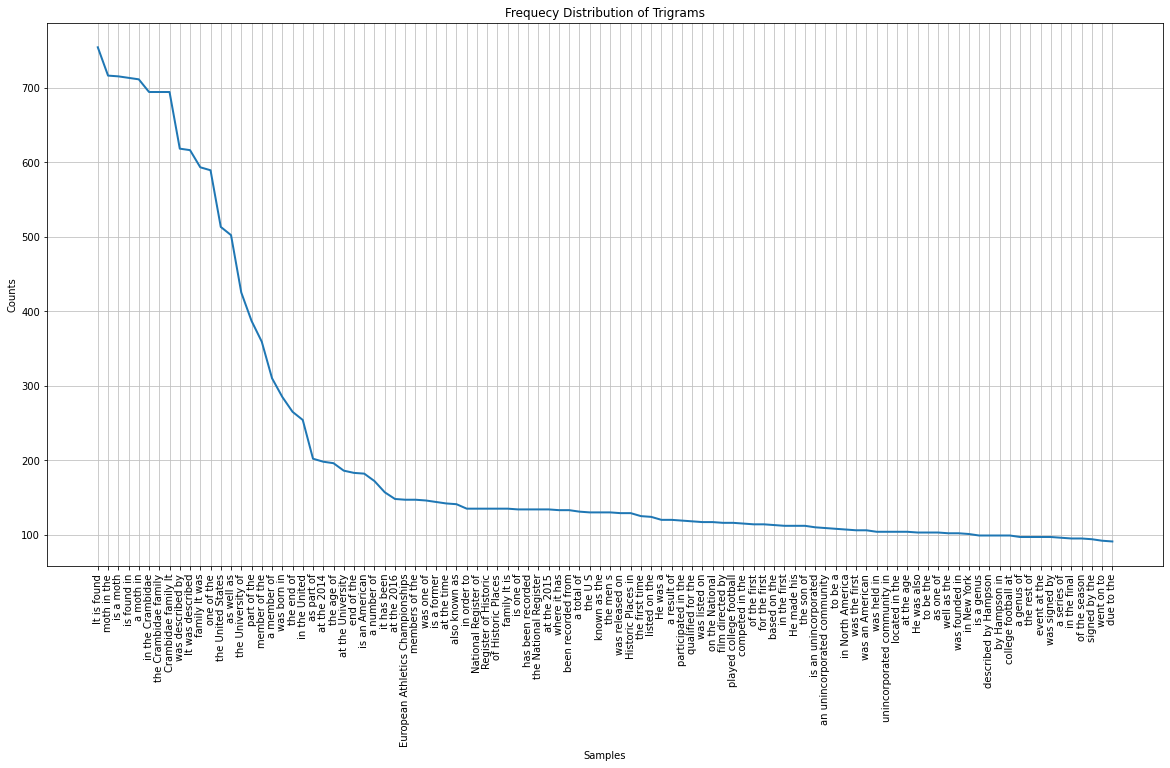

======== Frequency Vs Rank ==========


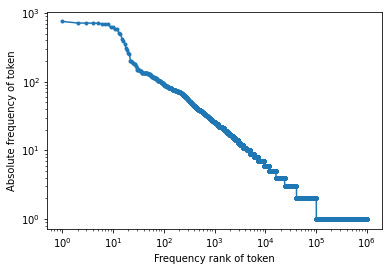

<Figure size 1440x720 with 0 Axes>

(c) Most frequent  Trigrams  required to cover 90% of corpus are: 865664
============== After Stemming Analysis =================
 Q4 
============== Unigram Analysis Q1=================
 (a) Total of Unique  Unigrams  present are: 52787
 (b) Frequency Distribution plot


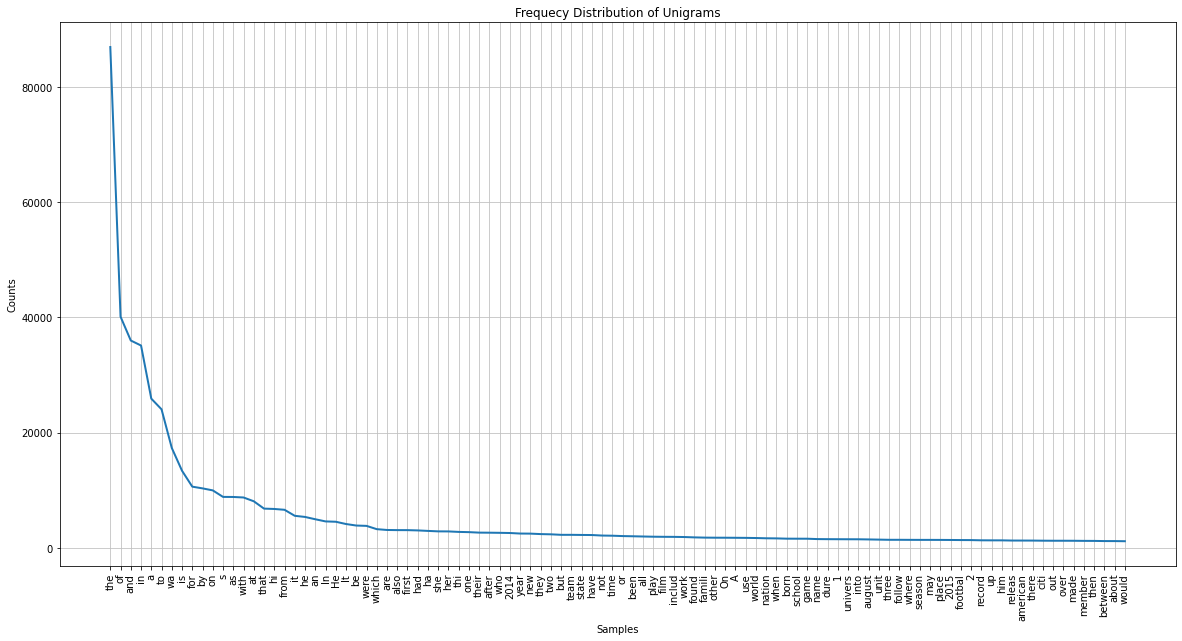

======== Frequency Vs Rank ==========


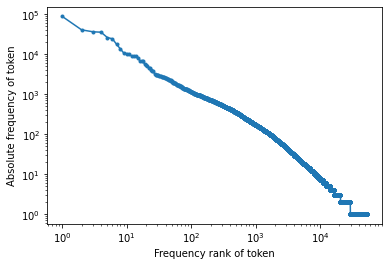

<Figure size 1440x720 with 0 Axes>

(c) Most frequent  Unigrams  required to cover 90% of corpus are: 13019
============== Bigram Analysis Q2=================
 (a) Total of Unique  Bigrams  present are: 503266
 (b) Frequency Distribution plot


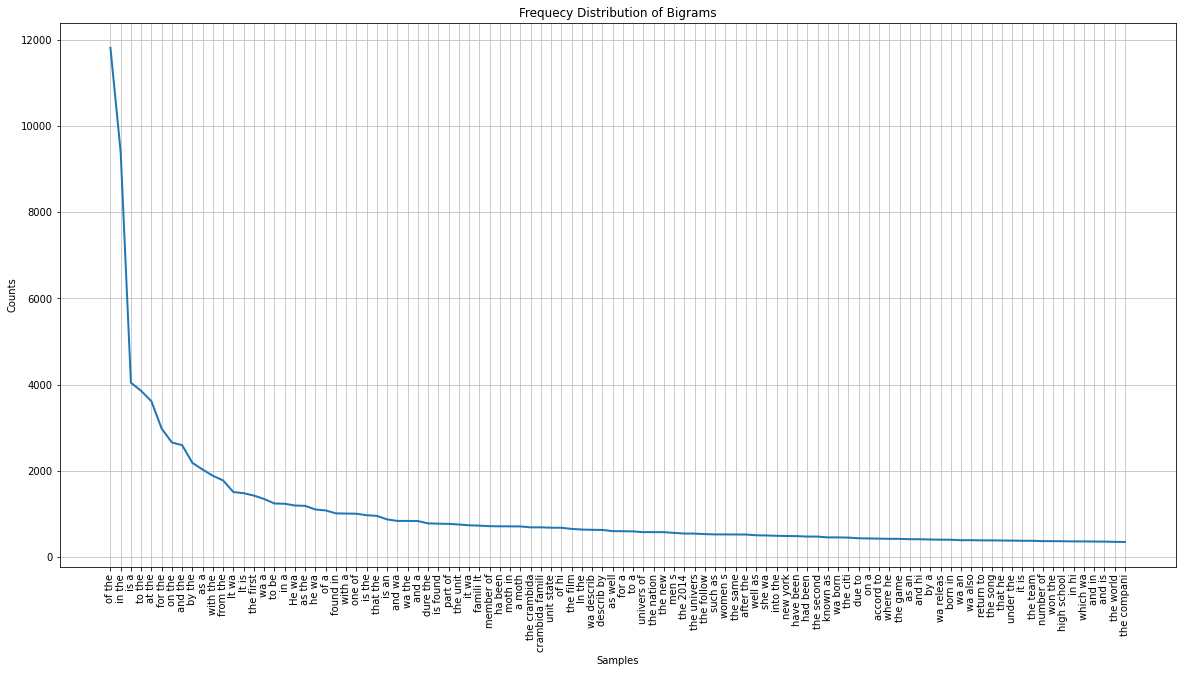

======== Frequency Vs Rank ==========


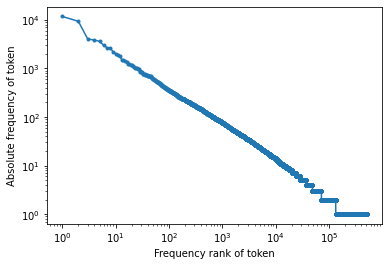

<Figure size 1440x720 with 0 Axes>

(c) Most frequent  Bigrams  required to cover 90% of corpus are: 397363
============== Trigram Analysis Q3=================
 (a) Total of Unique  Trigrams  present are: 958120
 (b) Frequency Distribution plot


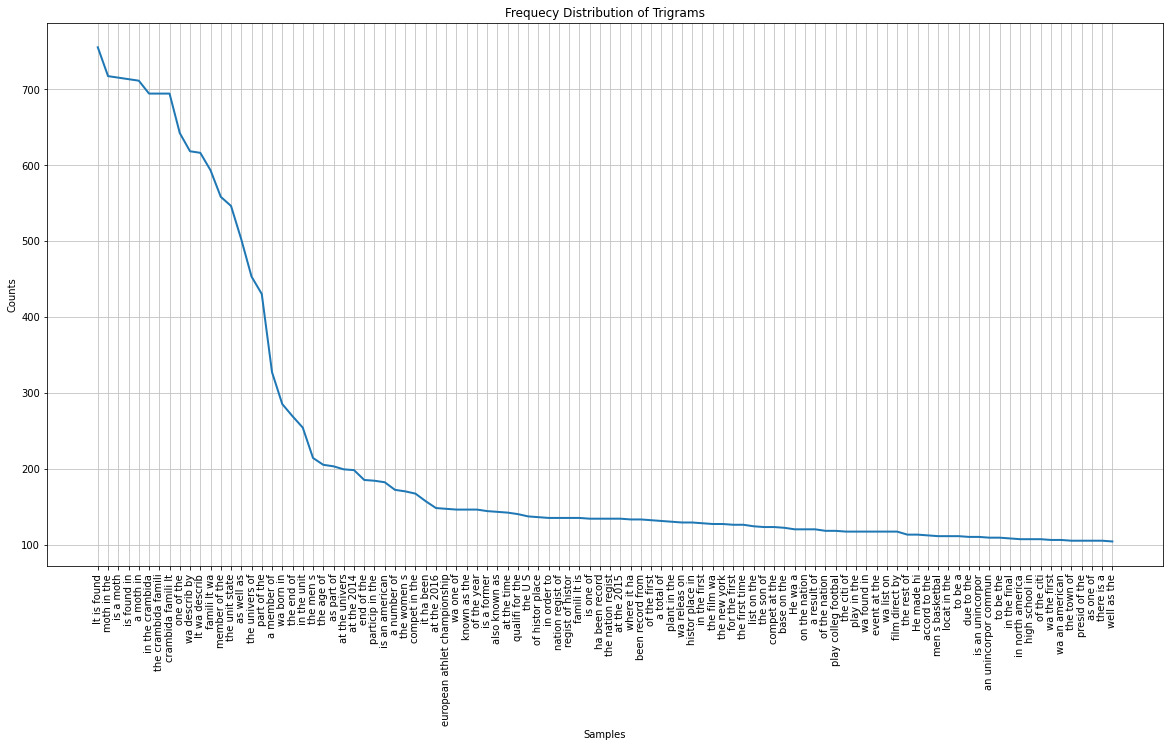

======== Frequency Vs Rank ==========


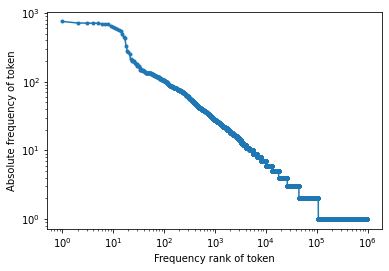

<Figure size 1440x720 with 0 Axes>

(c) Most frequent  Trigrams  required to cover 90% of corpus are: 837785


In [0]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist
from nltk.util import ngrams
from bs4 import BeautifulSoup
from nltk import word_tokenize
import numpy as np
from nltk.stem import PorterStemmer 
import matplotlib.pyplot as plt

#Function to create various n grams
#Input: data : corpus 
#       num : int (1 - Unigram, 2 - Bi-gram, 3 - Trigram)
#Output: n grams
def extract_ngrams(tokens, num):    
    n_grams = ngrams(tokens, num) 
    return [ ' '.join(grams) for grams in n_grams]

#Remove punctuation from the corpus
def tokenize(data):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  return tokenizer.tokenize(data)

# Function to do the frequency ditribution analysis
#Input: freqDistribution : frequency distribution 
def corpusAnalysis(freqDistribution, type):
  # Print Unique n-grams from corpus
  uniq_Ngram = FreqDist(freqDistribution)
  print(" (a) Total of Unique ",type," present are:",len(uniq_Ngram))

  #Plot the distribution of most common 100 N-gram frequencies
  plt.figure(figsize=(20, 10))
  title = "Frequecy Distribution of "+type
  print(" (b) Frequency Distribution plot")
  FreqDist(uniq_Ngram).plot(100,cumulative=False, title=title)

  print("======== Frequency Vs Rank ==========")
  count = uniq_Ngram.most_common()
  ranks = arange(1, len(count)+1)
  frequencies = list()
  for value, index in count:
    frequencies.append(index)  
  plt.loglog(ranks, frequencies, marker=".")
  plt.xlabel("Frequency rank of token")
  plt.ylabel("Absolute frequency of token")
  plt.figure(figsize=(20, 10))
  plt.show()

  #Number of words covering 90% of corpus
  fre = 0
  wordCount=0
  for grams in uniq_Ngram:
    fre += uniq_Ngram.freq(grams)
    wordCount = wordCount +1
    if(fre >= 0.90):
      break
  print("(c) Most frequent ",type," required to cover 90% of corpus are:",wordCount)  

# Function NGram Token analysis
# Corpus
def nGramTokenAnalysis(tokens):
  #Perform Analysis of unigram tokens
  print("============== Unigram Analysis Q1=================")
  unigrams=extract_ngrams(tokens, 1)
  corpusAnalysis(unigrams, "Unigrams")
  print("====================================================")

  print("============== Bigram Analysis Q2=================")
  #Perform Analysis of bi-gram tokens
  unigrams=extract_ngrams(tokens, 2)
  corpusAnalysis(unigrams, "Bigrams")
  print("====================================================")

  print("============== Trigram Analysis Q3=================")
  #Perform Analysis of tri-gram tokens
  unigrams=extract_ngrams(tokens, 3)
  corpusAnalysis(unigrams, "Trigrams")
  print("====================================================")

#Connect to drive and download the corpus
nltk.download('punkt')
corpus = PlaintextCorpusReader('/content/drive/My Drive/IR/AN', 'wiki_00')
soup = BeautifulSoup(corpus.raw())
# Remove hyper links
for m in soup.find_all('a'):
  m.replaceWithChildren()

tokens = tokenize(soup.get_text())
print("============== Before Stemming Analysis =================")
#Perform N-Gram token analysis
nGramTokenAnalysis(tokens)

print("============== After Stemming Analysis =================")
print(" Q4 ")

#Peform stemming
porter = nltk.PorterStemmer()
stemmed_tokens = list() 
for token in tokens:
  stemmed_tokens.append(porter.stem(token))

#Perform N-Gram token analysis After stemming
nGramTokenAnalysis(stemmed_tokens)



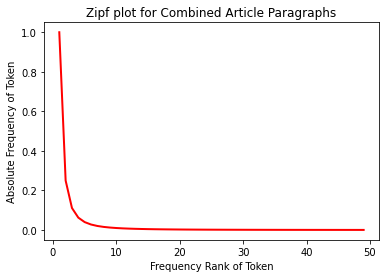

In [0]:
import random
import matplotlib.pyplot as plt
from scipy import special
import numpy as np

#Generate sample dict with random value to simulate paragraph data
frequency = {}
for i,j in enumerate(range(50)):
    frequency[i]=random.randint(1,50)

counts = frequency.values()
tokens = frequency.keys()


#Convert counts of values to numpy array
s = np.array(counts)

#define zipf distribution parameter. Has to be >1
a = 2. 

# Display the histogram of the samples,
#along with the probability density function
#count, bins, ignored = plt.hist(s, 50, normed=True)
plt.title("Zipf plot for Combined Article Paragraphs")
x = np.arange(1., 50.)
plt.xlabel("Frequency Rank of Token")
y = x**(-a) / special.zetac(a)
plt.ylabel("Absolute Frequency of Token")
plt.plot(x, y/max(y), linewidth=2, color='r')
plt.show()

In [0]:
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import FreqDist
from nltk.util import ngrams
from bs4 import BeautifulSoup
from nltk import word_tokenize
import numpy as np
from nltk.stem import PorterStemmer 
import matplotlib.pyplot as plt

def tokenize(data):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  return tokenizer.tokenize(data)

corpus = PlaintextCorpusReader('/content/drive/My Drive/IR/AN', 'wiki_00')
soup = BeautifulSoup(corpus.raw())
# Remove hyper links
for m in soup.find_all('a'):
  m.replaceWithChildren()

tokens = tokenize(soup.get_text())
print(len(tokens))

uniq_Ngram = FreqDist(tokens)



1275335


[    1     2     3 ... 75871 75872 75873]
[74045, 40133, 35899, 35121, 25893, 24035, 17303, 13359, 12940, 10317]


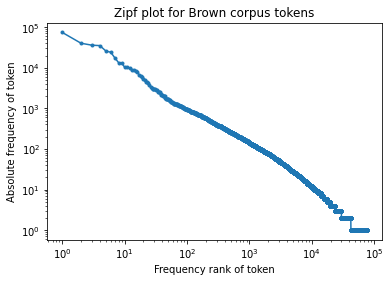

In [0]:
count = uniq_Ngram.most_common()
ranks = arange(1, len(count)+1)
print(ranks)
frequencies = list()
for value, index in count:
  frequencies.append(index)
print(frequencies[:10])
loglog(ranks, frequencies, marker=".", pickradius=100)
title("Zipf plot for Brown corpus tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
show()

In [0]:
from nltk.corpus import brown
from collections import Counter
from __future__ import division
from itertools import *
from pylab import *
nltk.download('brown')
tokens_with_count = Counter(brown.words())
counts = array(tokens_with_count.values())
tokens = tokens_with_count.keys()
print(len(counts.tolist()))
print(tokens)
# A Zipf plot
ranks = arange(1, len(counts.tolist())+1)
print(ranks)
indices = argsort(-counts.tolist)
frequencies = counts[indices]

loglog(ranks, frequencies, marker=".", pickradius=10)
title("Zipf plot for Brown corpus tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
# for n in list(logspace(-0.5, log10(len(counts)), 20).astype(int)):
#     dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
#                  verticalalignment="bottom",
#                  horizontalalignment="left")

show()

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
56057
dict_keys(['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'jury', 'further', 'in', 'term-end', 'presentments', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'September-October', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'possible', 'hard-fought', 'won', 'Mayor-nominate', 'Ivan', 'Allen', 'Jr.', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', "Georgia's", 'registration', 'laws

TypeError: ignored